In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data=pd.read_csv('/Users/leeseungjoon/Desktop/Kaggle/KaKR_Titanic/train.csv',sep= ',')
test_data=pd.read_csv('/Users/leeseungjoon/Desktop/Kaggle/KaKR_Titanic/test.csv',sep= ',')

In [3]:
train_y = train_data.Survived

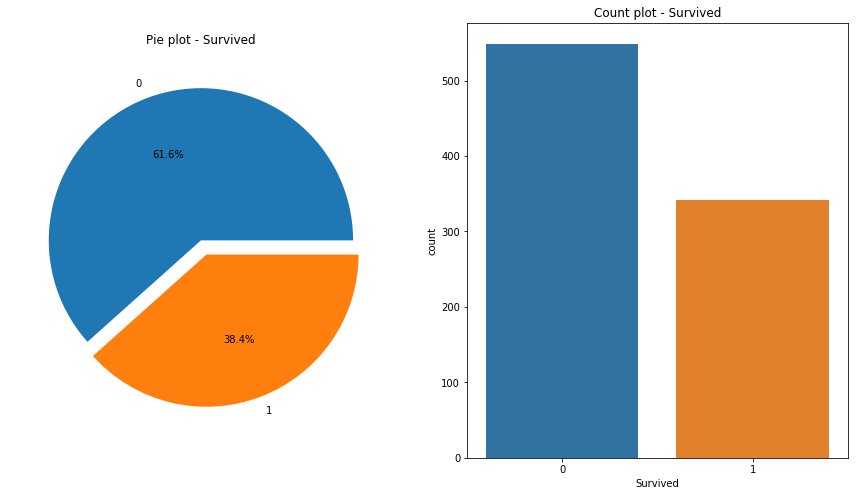

In [4]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train_data.Survived.value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(train_data['Pclass'],train_data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


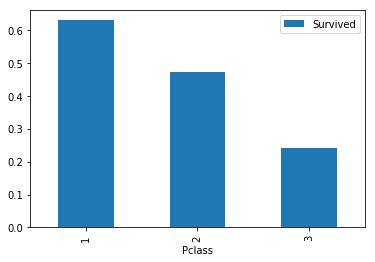

In [16]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

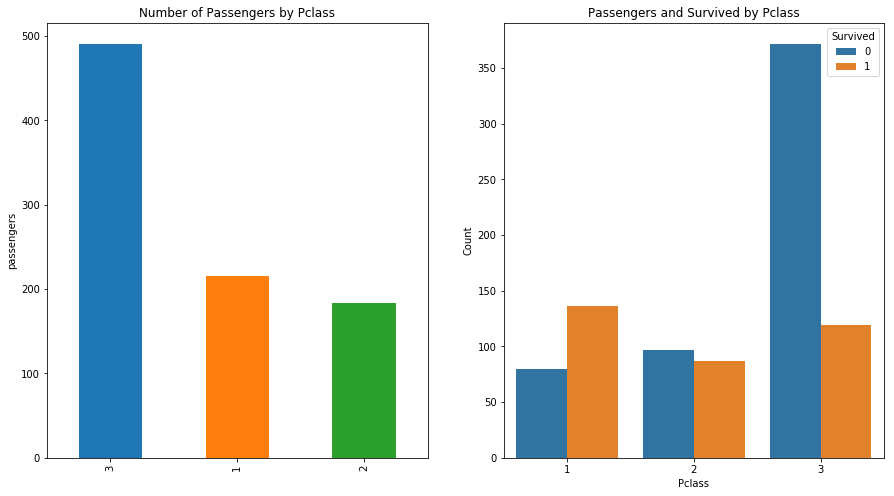

In [18]:
f,ax=plt.subplots(1,2, figsize=(15,8))
train_data.Pclass.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('passengers')
sns.countplot('Pclass', hue='Survived',data=train_data, ax=ax[1])
ax[1].set_title("Passengers and Survived by Pclass")
ax[1].set_ylabel('Count')
plt.show()

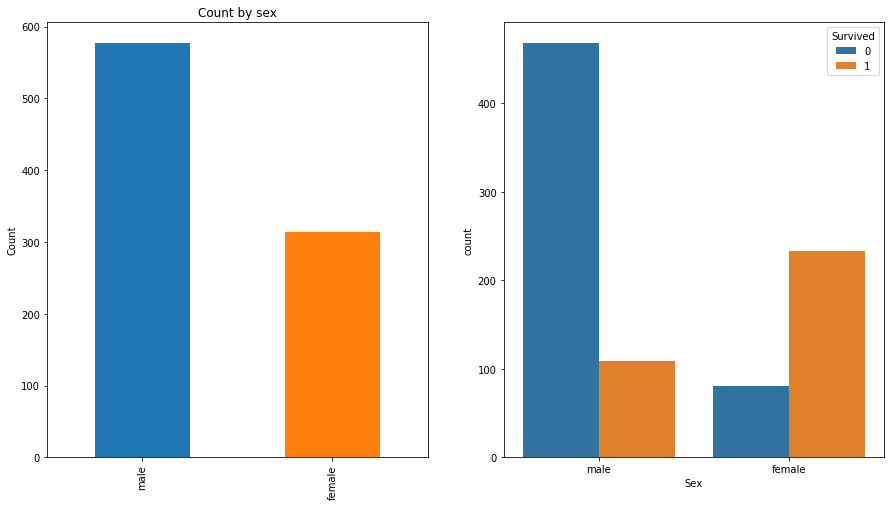

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,8))
train_data.Sex.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Count by sex')
ax[0].set_ylabel('Count')
sns.countplot('Sex',hue='Survived',data=train_data, ax=ax[1])
plt.show()

/anaconda3/envs/MyEnvironment/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/envs/MyEnvironment/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


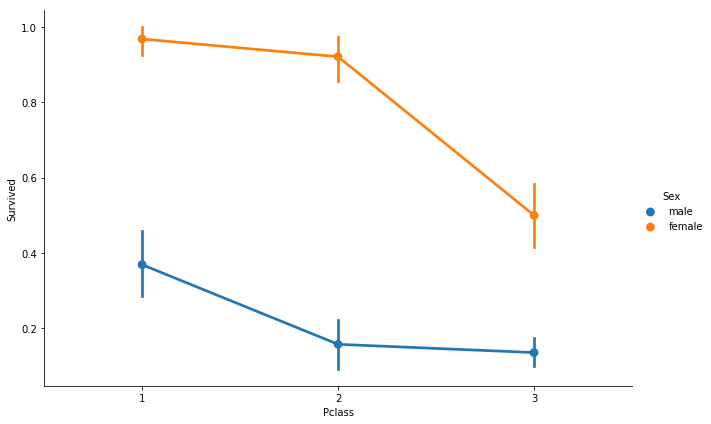

In [20]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data,size=6, aspect=1.5)

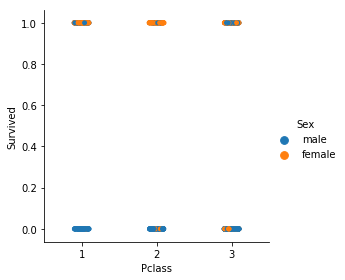

In [21]:
sns.catplot('Pclass','Survived',hue='Sex',data=train_data, height=4, aspect=1)

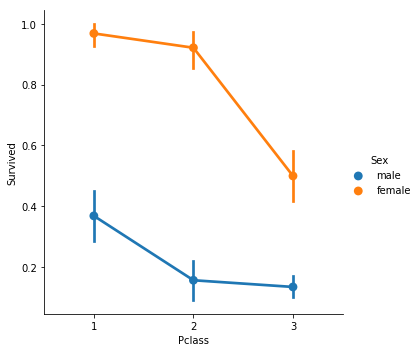

In [22]:
sns.catplot('Pclass','Survived',hue='Sex',data=train_data,kind='point')

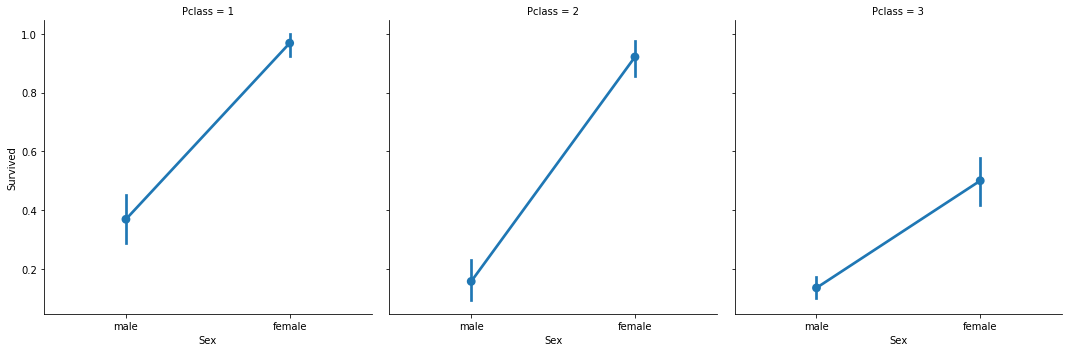

In [23]:
sns.catplot('Sex','Survived', col='Pclass', data=train_data,kind='point',height=5)

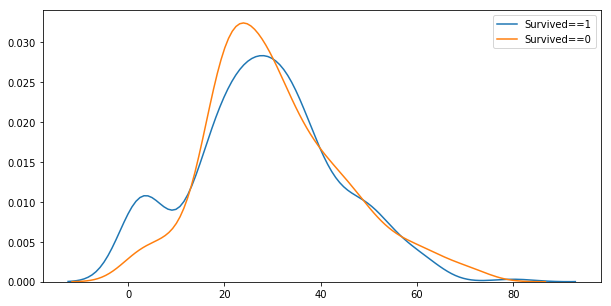

In [28]:
fig,ax=plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'],ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

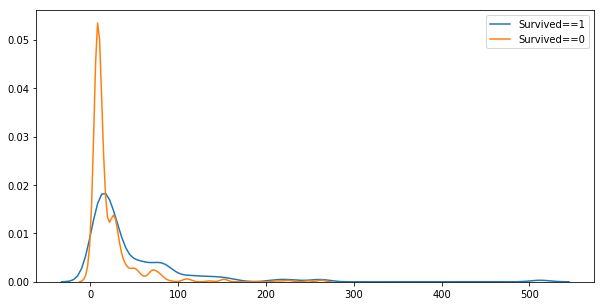

In [29]:
fig,ax=plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'],ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

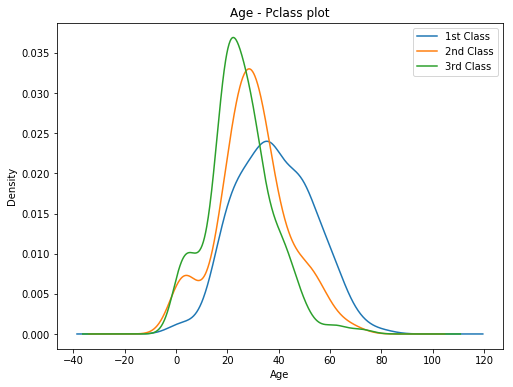

In [30]:
plt.figure(figsize=(8,6))
train_data['Age'][train_data['Pclass']==1].plot(kind='kde')
train_data['Age'][train_data['Pclass']==2].plot(kind='kde')
train_data['Age'][train_data['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age - Pclass plot')
plt.legend(['1st Class','2nd Class','3rd Class'])

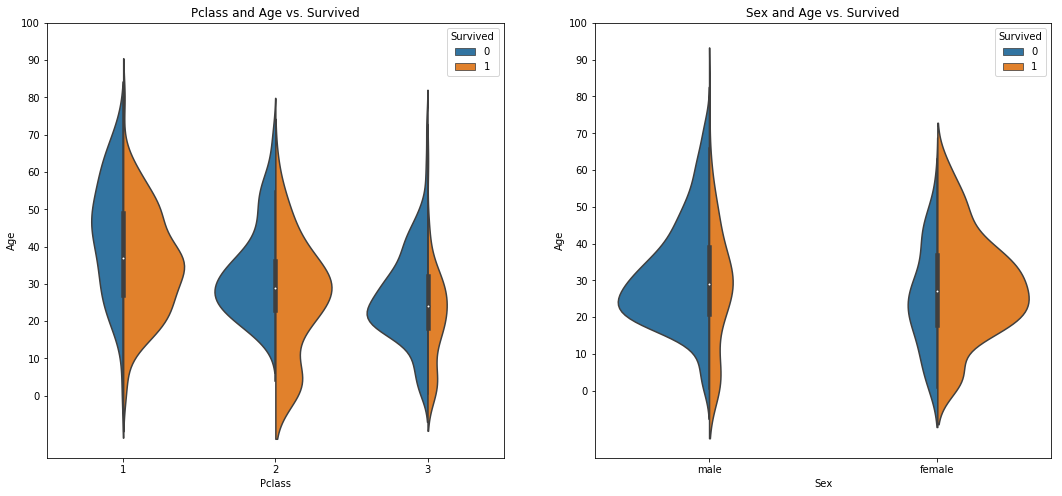

In [33]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data, scale='count', split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs. Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs. Survived")
ax[1].set_yticks(range(0,110,10))

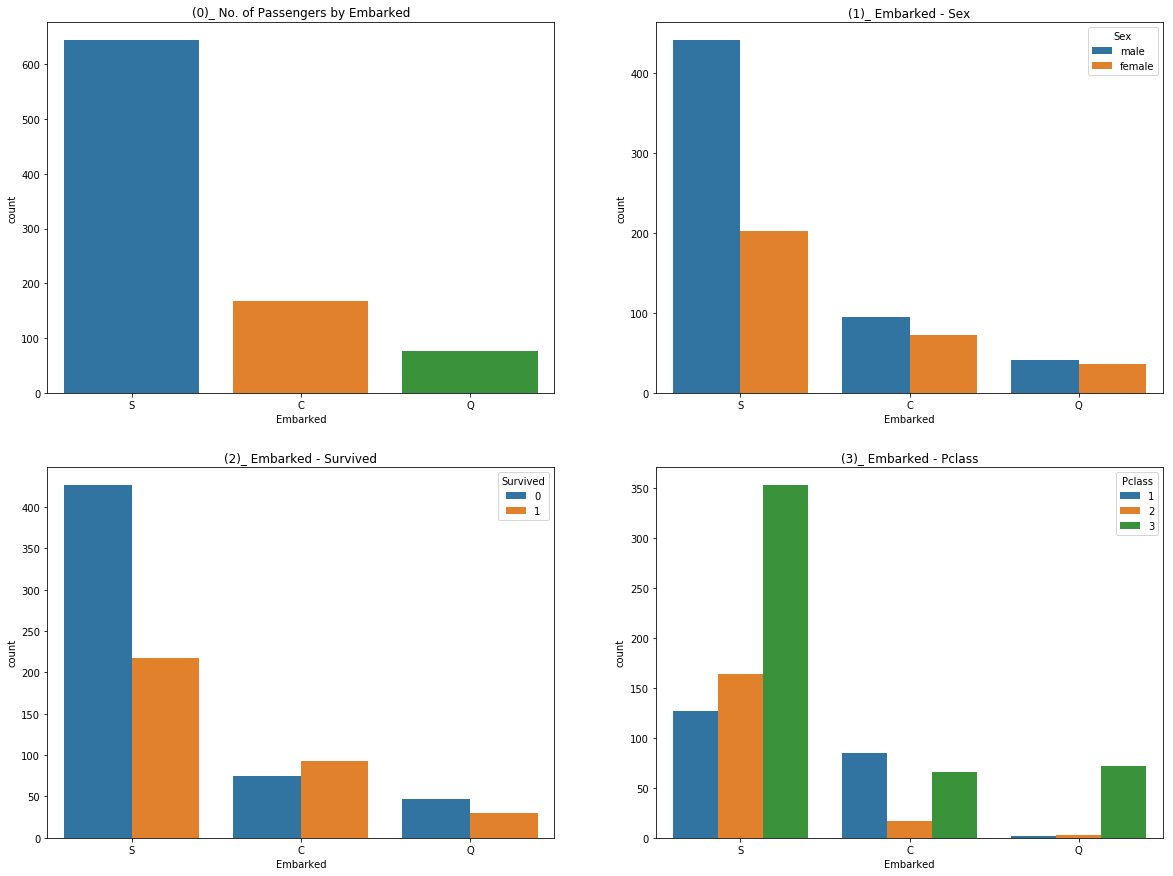

In [34]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot("Embarked",data=train_data, ax=ax[0,0])
ax[0,0].set_title("(0)_ No. of Passengers by Embarked")
sns.countplot("Embarked", hue="Sex", data=train_data, ax=ax[0,1])
ax[0,1].set_title("(1)_ Embarked - Sex")
sns.countplot("Embarked", hue="Survived", data=train_data, ax=ax[1,0])
ax[1,0].set_title("(2)_ Embarked - Survived")
sns.countplot("Embarked", hue='Pclass', data=train_data, ax=ax[1,1])
ax[1,1].set_title("(3)_ Embarked - Pclass")
plt.show()

In [38]:
train_data['Family']=train_data['SibSp']+train_data['Parch']+1
test_data['Family']=test_data['SibSp']+test_data['Parch']+1

print("Maximum size of Family: ", train_data['Family'].max())
print("Minimum size of Family: ", train_data['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


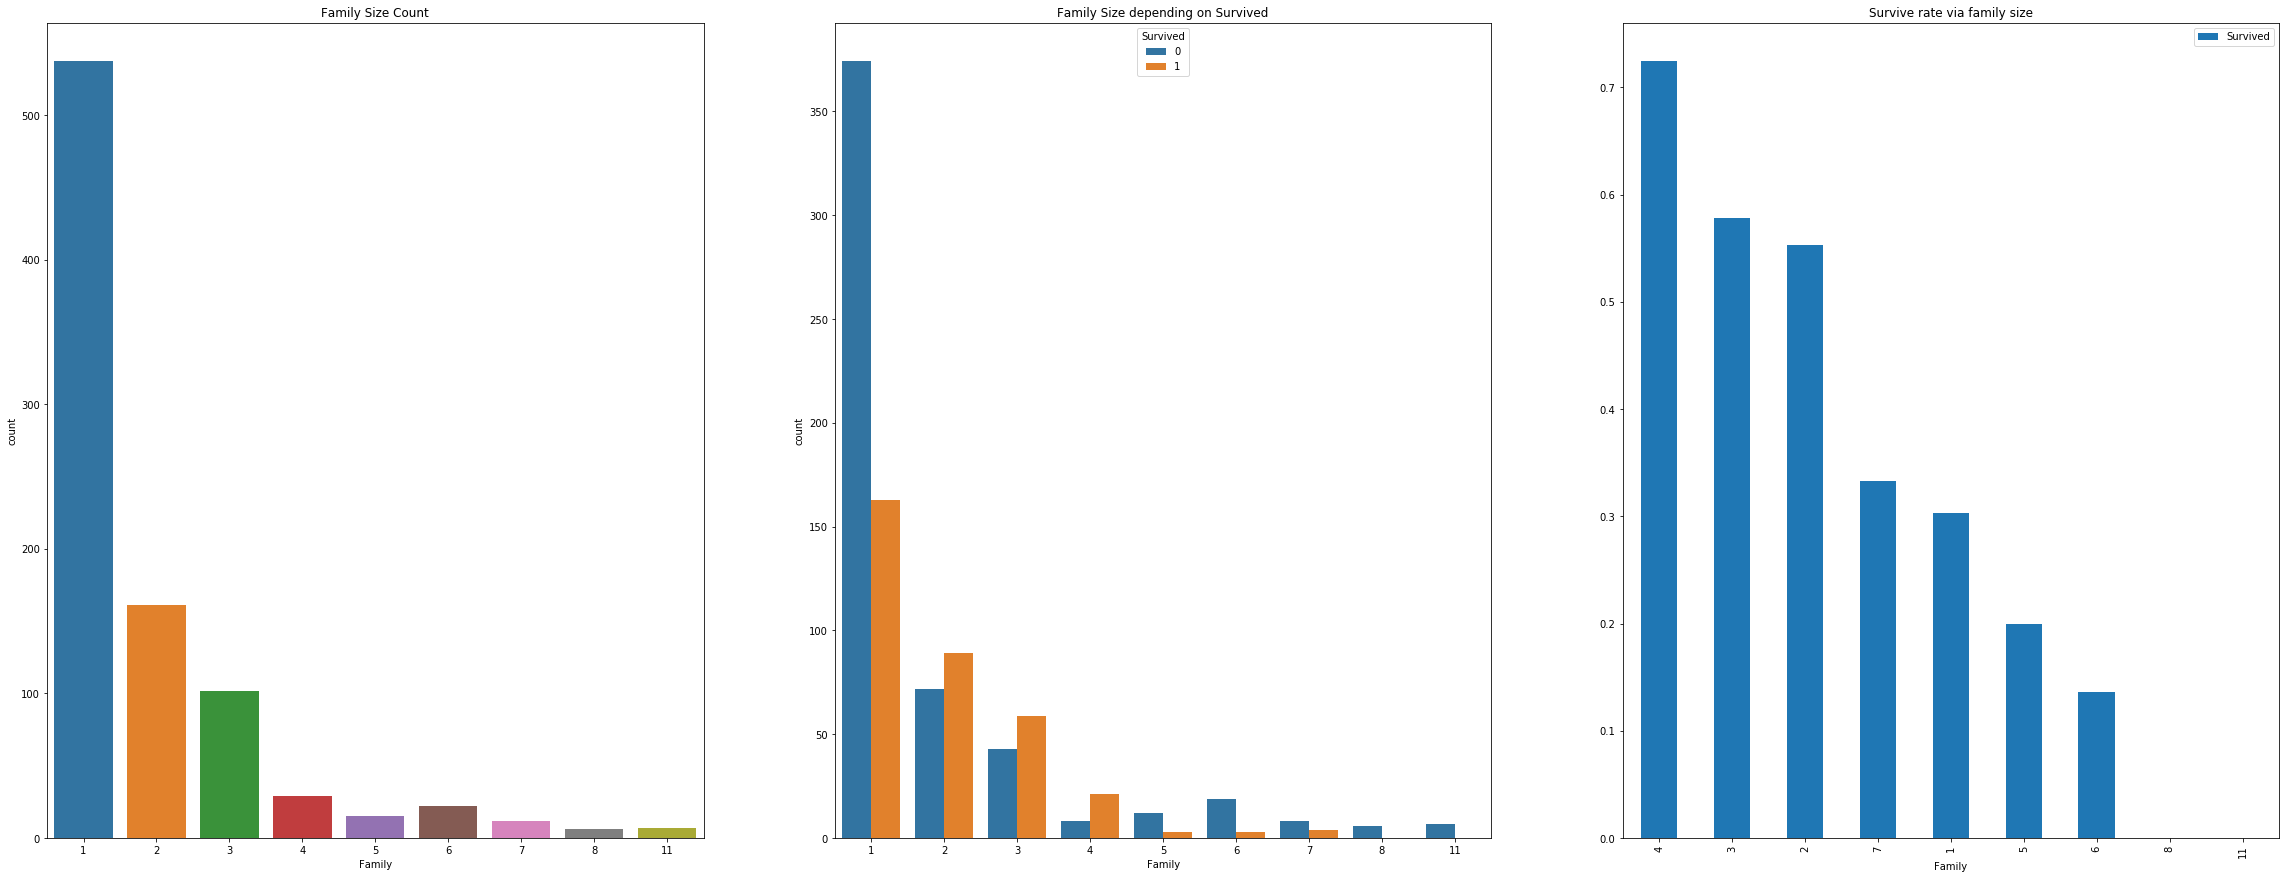

In [44]:
f,ax=plt.subplots(1, 3, figsize=(40,15))
sns.countplot('Family',data=train_data, ax=ax[0])
ax[0].set_title("Family Size Count")
sns.countplot('Family', hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title("Family Size depending on Survived")
train_data[['Family', 'Survived']].groupby(['Family'],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("Survive rate via family size")
plt.show()

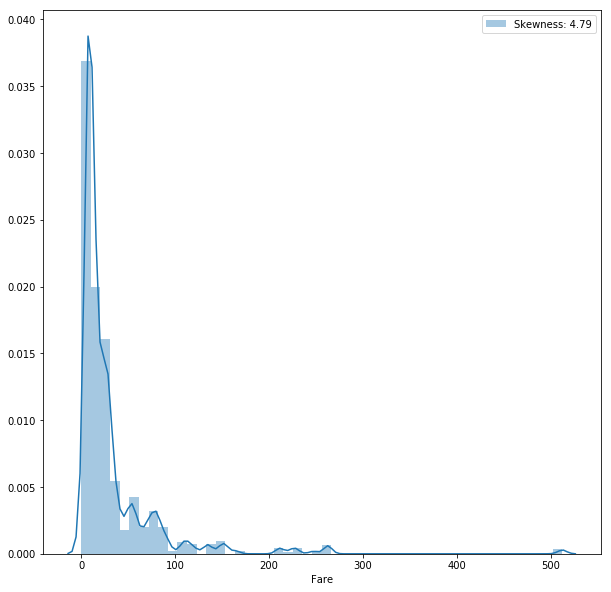

In [51]:
fig,ax=plt.subplots(1,1, figsize=(10,10))
g=sns.distplot(train_data['Fare'],label='Skewness: {:.2f}'.format(train_data['Fare'].skew(),ax=ax))
g=g.legend(loc='best')

In [53]:
test_data.loc[test_data['Fare'].isnull()==True, 'Fare']=test_data['Fare'].mean()
train_data['Fare'] = train_data['Fare'].map(lambda i: np.log(i) if i>0 else 0)
test_data['Fare']=test_data['Fare'].map(lambda i:np.log(i) if i>0 else 0)

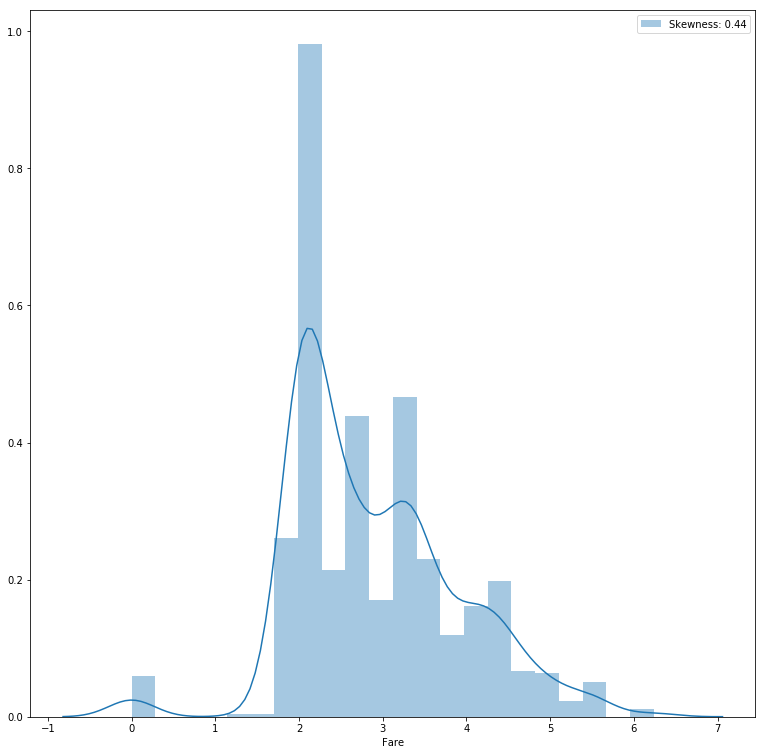

In [63]:
fig,ax=plt.subplots(1,1,figsize=(13,13))
gr=sns.distplot(train_data['Fare'], label='Skewness: {:.2f}'.format(train_data['Fare'].skew()),ax=ax)
gr=gr.legend(loc='best')

In [64]:
train_data['Initial']= train_data['Name'].str.extract('([A-Za-z]+)\.')
test_data['Initial']=test_data['Name'].str.extract('([A-Za-z]+)\.')

In [65]:
train_data.Initial

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object

In [69]:
pd.crosstab(train_data['Initial'], train_data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [77]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'],inplace=True)
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'],inplace=True)
train_data.loc[(train_data['Initial']=='Mr') & (train_data['Sex']=='female'),'Initial']='Mrs'
pd.crosstab(train_data['Initial'], train_data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,128,0
male,40,0,528,0,9


In [73]:
pd.crosstab(test_data['Initial'], test_data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,80,0,72,0
male,21,0,241,0,4


In [79]:
train_data.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.234848,0.160985,2.384470,32.699755,0.293561,0.151515,2.650363,1.445076
Mrs,459.054688,0.796875,1.976562,36.099099,0.687500,0.812500,3.442279,2.500000
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [80]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age'] = 33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age'] = 36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age'] = 5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age'] = 22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age'] = 46

test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age'] = 33
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age'] = 36
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age'] = 5
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age'] = 22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age'] = 46

In [81]:
train_data['Embarked'].fillna('S', inplace=True)